# NOTEBOOK 01: EXPLORATORY DATA ANALYSIS
## Credit Risk Early Warning System

**OBJECTIVES:**
1. Load and understand the Home Credit dataset structure
2. Analyze the target variable (default rate)
3. Identify data quality issues (missing values, outliers)
4. Explore key features related to credit risk
5. Document findings for feature engineering phase

# 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')

# Define paths
PROJECT_ROOT = Path.cwd().parent  # Go up from notebooks/ to project root
DATA_RAW = PROJECT_ROOT / 'data' / 'raw'
DATA_PROCESSED = PROJECT_ROOT / 'data' / 'processed'

print(f"Project root: {PROJECT_ROOT}")
print(f"Raw data path: {DATA_RAW}")

Project root: c:\Users\carlo\Documents\4.DS\credit-risk-early-warning-system
Raw data path: c:\Users\carlo\Documents\4.DS\credit-risk-early-warning-system\data\raw


In [2]:
# Load the main training dataset
print("Loading application_train.csv...")
df = pd.read_csv(DATA_RAW / 'application_train.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Loading application_train.csv...
Dataset loaded successfully!
Shape: 307,511 rows × 122 columns


# 2. Initial Data Exploration

## 2.1 EDA Application train | test

In [3]:
# First look at the data
print("=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
df.head()

FIRST 5 ROWS


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012
TARGET,1,0,0,0,0,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N
...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,NaN
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN


In [5]:
# Data types summary
print("=" * 60)
print("DATA TYPES SUMMARY")
print("=" * 60)
print(f"\nNumerical columns: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"Categorical columns: {df.select_dtypes(include=['object']).shape[1]}")
print(f"\nDetailed breakdown:")
print(df.dtypes.value_counts())

DATA TYPES SUMMARY

Numerical columns: 106
Categorical columns: 16

Detailed breakdown:
float64    65
int64      41
object     16
Name: count, dtype: int64


In [6]:
# Basic statistics for numerical columns
print("=" * 60)
print("NUMERICAL STATISTICS")
print("=" * 60)
df.describe().T

NUMERICAL STATISTICS


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [7]:
# =============================================================================
# PIVOT TABLE ANALYSIS: Occupation vs Default Rate
# =============================================================================

# Method 1: Using groupby (most common)
occupation_analysis = df.groupby('OCCUPATION_TYPE').agg(
    No_Default=('TARGET', lambda x: (x == 0).sum()),
    Yes_Default=('TARGET', lambda x: (x == 1).sum()),
    Total=('TARGET', 'count'),
    Default_Rate=('TARGET', 'mean')
).round(4)

# Sort by default rate descending
occupation_analysis = occupation_analysis.sort_values('Default_Rate', ascending=False)

# Add percentage columns
occupation_analysis['No_Pct'] = (occupation_analysis['No_Default'] / occupation_analysis['Total'] * 100).round(1)
occupation_analysis['Yes_Pct'] = (occupation_analysis['Default_Rate'] * 100).round(1)

print("OCCUPATION vs DEFAULT RATE")
print("=" * 80)
print(occupation_analysis.to_string())

OCCUPATION vs DEFAULT RATE
                       No_Default  Yes_Default  Total  Default_Rate  No_Pct  Yes_Pct
OCCUPATION_TYPE                                                                     
Low-skill Laborers           1734          359   2093        0.1715    82.8     17.2
Drivers                     16496         2107  18603        0.1133    88.7     11.3
Waiters/barmen staff         1196          152   1348        0.1128    88.7     11.3
Security staff               5999          722   6721        0.1074    89.3     10.7
Laborers                    49348         5838  55186        0.1058    89.4     10.6
Cooking staff                5325          621   5946        0.1044    89.6     10.4
Sales staff                 29010         3092  32102        0.0963    90.4      9.6
Cleaning staff               4206          447   4653        0.0961    90.4      9.6
Realty agents                 692           59    751        0.0786    92.1      7.9
Secretaries                  1213     

In [8]:
# Method 2: Using pd.pivot_table (Excel-style)
pivot = pd.pivot_table(
    df,
    values='SK_ID_CURR',           # Column to count
    index='OCCUPATION_TYPE',        # Rows
    columns='TARGET',               # Columns (0 and 1)
    aggfunc='count',                # Count occurrences
    fill_value=0
)

# Rename columns
pivot.columns = ['No_Default', 'Yes_Default']
pivot['Total'] = pivot['No_Default'] + pivot['Yes_Default']
pivot['Default_Rate'] = (pivot['Yes_Default'] / pivot['Total'] * 100).round(1)
pivot = pivot.sort_values('Default_Rate', ascending=False)

print("\nPIVOT TABLE - Occupation vs Default")
print("=" * 80)
print(pivot.to_string())


PIVOT TABLE - Occupation vs Default
                       No_Default  Yes_Default  Total  Default_Rate
OCCUPATION_TYPE                                                    
Low-skill Laborers           1734          359   2093          17.2
Drivers                     16496         2107  18603          11.3
Waiters/barmen staff         1196          152   1348          11.3
Security staff               5999          722   6721          10.7
Laborers                    49348         5838  55186          10.6
Cooking staff                5325          621   5946          10.4
Sales staff                 29010         3092  32102           9.6
Cleaning staff               4206          447   4653           9.6
Realty agents                 692           59    751           7.9
Secretaries                  1213           92   1305           7.0
Medicine staff               7965          572   8537           6.7
Private service staff        2477          175   2652           6.6
IT staff   

In [9]:
# Method 3: pd.crosstab (quickest for simple counts)
cross = pd.crosstab(
    df['OCCUPATION_TYPE'], 
    df['TARGET'], 
    margins=True,           # Adds row/column totals
    normalize='index'       # Shows percentages by row
) * 100

print("\nCROSSTAB - Default Rate by Occupation (%)")
print("=" * 80)
print(cross.round(1).to_string())


CROSSTAB - Default Rate by Occupation (%)
TARGET                    0     1
OCCUPATION_TYPE                  
Accountants            95.2   4.8
Cleaning staff         90.4   9.6
Cooking staff          89.6  10.4
Core staff             93.7   6.3
Drivers                88.7  11.3
HR staff               93.6   6.4
High skill tech staff  93.8   6.2
IT staff               93.5   6.5
Laborers               89.4  10.6
Low-skill Laborers     82.8  17.2
Managers               93.8   6.2
Medicine staff         93.3   6.7
Private service staff  93.4   6.6
Realty agents          92.1   7.9
Sales staff            90.4   9.6
Secretaries            93.0   7.0
Security staff         89.3  10.7
Waiters/barmen staff   88.7  11.3
All                    91.2   8.8


In [10]:
# Show only the categorical columns in the dataframe
categorical_df = df.select_dtypes(include=['object'])
categorical_df.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [11]:
# Get categorical columns with additional info
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Number of categorical variables: {len(categorical_columns)}")
print("\nCategorical Variables:")
for col in categorical_columns:
    print(f"  - {col}: {df[col].nunique()} unique values")

Number of categorical variables: 16

Categorical Variables:
  - NAME_CONTRACT_TYPE: 2 unique values
  - CODE_GENDER: 3 unique values
  - FLAG_OWN_CAR: 2 unique values
  - FLAG_OWN_REALTY: 2 unique values
  - NAME_TYPE_SUITE: 7 unique values
  - NAME_INCOME_TYPE: 8 unique values
  - NAME_EDUCATION_TYPE: 5 unique values
  - NAME_FAMILY_STATUS: 6 unique values
  - NAME_HOUSING_TYPE: 6 unique values
  - OCCUPATION_TYPE: 18 unique values
  - WEEKDAY_APPR_PROCESS_START: 7 unique values
  - ORGANIZATION_TYPE: 58 unique values
  - FONDKAPREMONT_MODE: 4 unique values
  - HOUSETYPE_MODE: 3 unique values
  - WALLSMATERIAL_MODE: 7 unique values
  - EMERGENCYSTATE_MODE: 2 unique values


In [12]:
# Get list of categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:")
print(categorical_cols)
print(f"\nTotal categorical variables: {len(categorical_cols)}")

# Optional: Show unique values for each categorical variable
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")

Categorical Variables:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Total categorical variables: 16

NAME_CONTRACT_TYPE: 2 unique values

CODE_GENDER: 3 unique values

FLAG_OWN_CAR: 2 unique values

FLAG_OWN_REALTY: 2 unique values

NAME_TYPE_SUITE: 7 unique values

NAME_INCOME_TYPE: 8 unique values

NAME_EDUCATION_TYPE: 5 unique values

NAME_FAMILY_STATUS: 6 unique values

NAME_HOUSING_TYPE: 6 unique values

OCCUPATION_TYPE: 18 unique values

WEEKDAY_APPR_PROCESS_START: 7 unique values

ORGANIZATION_TYPE: 58 unique values

FONDKAPREMONT_MODE: 4 unique values

HOUSETYPE_MODE: 3 unique values

WALLSMATERIAL_MODE: 7 unique values

EMERGENCYSTATE_MODE: 2 unique values


In [13]:
# Get categorical columns with additional info
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Number of categorical variables: {len(categorical_columns)}")
print("\nCategorical Variables:")
for col in categorical_columns:
    print(f"  - {col}: {df[col].nunique()} unique values")

Number of categorical variables: 16

Categorical Variables:
  - NAME_CONTRACT_TYPE: 2 unique values
  - CODE_GENDER: 3 unique values
  - FLAG_OWN_CAR: 2 unique values
  - FLAG_OWN_REALTY: 2 unique values
  - NAME_TYPE_SUITE: 7 unique values
  - NAME_INCOME_TYPE: 8 unique values
  - NAME_EDUCATION_TYPE: 5 unique values
  - NAME_FAMILY_STATUS: 6 unique values
  - NAME_HOUSING_TYPE: 6 unique values
  - OCCUPATION_TYPE: 18 unique values
  - WEEKDAY_APPR_PROCESS_START: 7 unique values
  - ORGANIZATION_TYPE: 58 unique values
  - FONDKAPREMONT_MODE: 4 unique values
  - HOUSETYPE_MODE: 3 unique values
  - WALLSMATERIAL_MODE: 7 unique values
  - EMERGENCYSTATE_MODE: 2 unique values


In [14]:
cross = pd.crosstab(
    df['CODE_GENDER'], 
    df['TARGET'], 
    margins=True,           # Adds row/column totals
    normalize='index'       # Shows percentages by row
) * 100

print("\nCROSSTAB - Default Rate by Gender (%)")
print("=" * 80)
print(cross.round(1).to_string())


CROSSTAB - Default Rate by Gender (%)
TARGET           0     1
CODE_GENDER             
F             93.0   7.0
M             89.9  10.1
XNA          100.0   0.0
All           91.9   8.1


In [15]:
incometype_analysis = df.groupby('NAME_INCOME_TYPE').agg(
    No_Default=('TARGET', lambda x: (x == 0).sum()),
    Yes_Default=('TARGET', lambda x: (x == 1).sum()),
    Total=('TARGET', 'count'),
    Default_Rate=('TARGET', 'mean')
).round(4)

# Sort by default rate descending
incometype_analysis = incometype_analysis.sort_values('Yes_Default', ascending=False)

# Add percentage columns
incometype_analysis['No_Pct'] = (incometype_analysis['No_Default'] / incometype_analysis['Total'] * 100).round(1)
incometype_analysis['Yes_Pct'] = (incometype_analysis['Default_Rate'] * 100).round(1)
print("INCOME TYPE vs DEFAULT RATE")
print("=" * 80)
print(incometype_analysis.to_string())

INCOME TYPE vs DEFAULT RATE
                      No_Default  Yes_Default   Total  Default_Rate  No_Pct  Yes_Pct
NAME_INCOME_TYPE                                                                    
Working                   143550        15224  158774        0.0959    90.4      9.6
Commercial associate       66257         5360   71617        0.0748    92.5      7.5
Pensioner                  52380         2982   55362        0.0539    94.6      5.4
State servant              20454         1249   21703        0.0575    94.2      5.8
Unemployed                    14            8      22        0.3636    63.6     36.4
Maternity leave                3            2       5        0.4000    60.0     40.0
Businessman                   10            0      10        0.0000   100.0      0.0
Student                       18            0      18        0.0000   100.0      0.0


In [16]:
# Generate pivot tables for all categorical variables
for cat_col in categorical_cols:
    print(f"\n{'='*80}")
    print(f"PIVOT TABLE: {cat_col} vs DEFAULT RATE")
    print(f"{'='*80}")
    
    # Create pivot table
    pivot = pd.pivot_table(
        df,
        values='SK_ID_CURR',
        index=cat_col,
        columns='TARGET',
        aggfunc='count',
        fill_value=0
    )
    
    # Rename columns
    pivot.columns = ['No_Default', 'Yes_Default']
    pivot['Total'] = pivot['No_Default'] + pivot['Yes_Default']
    pivot['Default_Rate'] = (pivot['Yes_Default'] / pivot['Total'] * 100).round(1)
    pivot = pivot.sort_values('Default_Rate', ascending=False)
    
    print(pivot.to_string())
    print()


PIVOT TABLE: NAME_CONTRACT_TYPE vs DEFAULT RATE
                    No_Default  Yes_Default   Total  Default_Rate
NAME_CONTRACT_TYPE                                               
Cash loans              255011        23221  278232           8.3
Revolving loans          27675         1604   29279           5.5


PIVOT TABLE: CODE_GENDER vs DEFAULT RATE
             No_Default  Yes_Default   Total  Default_Rate
CODE_GENDER                                               
M                 94404        10655  105059          10.1
F                188278        14170  202448           7.0
XNA                   4            0       4           0.0


PIVOT TABLE: FLAG_OWN_CAR vs DEFAULT RATE
              No_Default  Yes_Default   Total  Default_Rate
FLAG_OWN_CAR                                               
N                 185675        17249  202924           8.5
Y                  97011         7576  104587           7.2


PIVOT TABLE: FLAG_OWN_REALTY vs DEFAULT RATE
                 N

## 2.2 EDA bureau

In [17]:
# 1. LOADING
# Load bureau.csv dataset
print("Loading bureau.csv dataset...")
dfb = pd.read_csv(DATA_RAW / 'bureau.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {dfb.shape[0]:,} rows × {dfb.shape[1]} columns")

Loading bureau.csv dataset...
Dataset loaded successfully!
Shape: 1,716,428 rows × 17 columns


In [18]:
# 2. FIRST LOOK
# First look at the data
print("=" * 60)
print("FIRST 9 ROWS")
print("=" * 60)
dfb.head(9).T

FIRST 9 ROWS


,0,1,2,3,4,5,6,7,8
SK_ID_CURR,215354,215354,215354,215354,215354,215354,215354,162297,162297
SK_ID_BUREAU,5714462,5714463,5714464,5714465,5714466,5714467,5714468,5714469,5714470
CREDIT_ACTIVE,Closed,Active,Active,Active,Active,Active,Active,Closed,Closed
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-497,-208,-203,-203,-629,-273,-43,-1896,-1146
CREDIT_DAY_OVERDUE,0,0,0,0,0,0,0,0,0
DAYS_CREDIT_ENDDATE,-153.0,1075.0,528.0,NaN,1197.0,27460.0,79.0,-1684.0,-811.0
DAYS_ENDDATE_FACT,-153.0,NaN,NaN,NaN,NaN,NaN,NaN,-1710.0,-840.0
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,77674.5,0.0,0.0,14985.0,0.0
CNT_CREDIT_PROLONG,0,0,0,0,0,0,0,0,0


In [19]:
# 3. EXPLORING CATEGORICAL VARIABLES
# Get categorical columns with additional info
categorical_columns = dfb.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Number of categorical variables: {len(categorical_columns)}")
print("\nCategorical Variables:")
for col in categorical_columns:
    print(f"  - {col}: {dfb[col].nunique()} unique values")

Number of categorical variables: 3

Categorical Variables:
  - CREDIT_ACTIVE: 4 unique values
  - CREDIT_CURRENCY: 4 unique values
  - CREDIT_TYPE: 15 unique values


In [20]:
# 4. PIVOT TABLE ANALYSIS FOR CATEGORICAL VARIABLES
# # Generate pivot tables for all categorical variables in bureau.csv (dfb dataset)
for cat_col in categorical_columns:
    print(f"\n{'='*80}")
    print(f"PIVOT TABLE: {cat_col} vs COUNT")
    print(f"{'='*80}")
    
    # Create pivot table counting occurrences
    pivot_bureau = pd.pivot_table(
        dfb,
        values='SK_ID_BUREAU',
        index=cat_col,
        aggfunc='count'
    )
    
    # Rename column
    pivot_bureau.columns = ['Count']
    pivot_bureau['Percentage'] = (pivot_bureau['Count'] / pivot_bureau['Count'].sum() * 100).round(2)
    pivot_bureau = pivot_bureau.sort_values('Count', ascending=False)
    
    print(pivot_bureau.to_string())
    print()


PIVOT TABLE: CREDIT_ACTIVE vs COUNT
                 Count  Percentage
CREDIT_ACTIVE                     
Closed         1079273       62.88
Active          630607       36.74
Sold              6527        0.38
Bad debt            21        0.00


PIVOT TABLE: CREDIT_CURRENCY vs COUNT
                   Count  Percentage
CREDIT_CURRENCY                     
currency 1       1715020       99.92
currency 2          1224        0.07
currency 3           174        0.01
currency 4            10        0.00


PIVOT TABLE: CREDIT_TYPE vs COUNT
                                                Count  Percentage
CREDIT_TYPE                                                      
Consumer credit                               1251615       72.92
Credit card                                    402195       23.43
Car loan                                        27690        1.61
Mortgage                                        18391        1.07
Microloan                                       12413      

## 2.3 EDA bureau_balance

In [21]:
# 1. LOADING
# Load bureau_balance.csv dataset
print("Loading bureau_balance.csv dataset...")
dfbl = pd.read_csv(DATA_RAW / 'bureau_balance.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {dfbl.shape[0]:,} rows × {dfbl.shape[1]} columns")

Loading bureau_balance.csv dataset...
Dataset loaded successfully!
Shape: 27,299,925 rows × 3 columns


In [22]:
# 2. FIRST LOOK
# First look at the data
print("=" * 60)
print("FIRST 9 ROWS")
print("=" * 60)
dfbl.head(9).T

FIRST 9 ROWS


,0,1,2,3,4,5,6,7,8
SK_ID_BUREAU,5715448,5715448,5715448,5715448,5715448,5715448,5715448,5715448,5715448
MONTHS_BALANCE,0,-1,-2,-3,-4,-5,-6,-7,-8
STATUS,C,C,C,C,C,C,C,C,C


In [23]:
# 3. EXPLORING CATEGORICAL VARIABLES
# Get categorical columns with additional info
categorical_columns = dfbl.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Number of categorical variables: {len(categorical_columns)}")
print("\nCategorical Variables:")
for col in categorical_columns:
    print(f"  - {col}: {dfbl[col].nunique()} unique values")

Number of categorical variables: 1

Categorical Variables:
  - STATUS: 8 unique values


In [24]:
# 4. PIVOT TABLE ANALYSIS FOR CATEGORICAL VARIABLES
# # Generate pivot tables for all categorical variables in bureau.csv (dfb dataset)
for cat_col in categorical_columns:
    print(f"\n{'='*80}")
    print(f"PIVOT TABLE: {cat_col} vs COUNT")
    print(f"{'='*80}")
    
    # Create pivot table counting occurrences
    pivot_bureau_balance = pd.pivot_table(
        dfbl,
        values='SK_ID_BUREAU',
        index=cat_col,
        aggfunc='count'
    )
    
    # Rename column
    pivot_bureau_balance.columns = ['Count']
    pivot_bureau_balance['Percentage'] = (pivot_bureau_balance['Count'] / pivot_bureau_balance['Count'].sum() * 100).round(2)
    pivot_bureau_balance = pivot_bureau_balance.sort_values('Count', ascending=False)
    
    print(pivot_bureau_balance.to_string())
    print()


PIVOT TABLE: STATUS vs COUNT
           Count  Percentage
STATUS                      
C       13646993       49.99
0        7499507       27.47
X        5810482       21.28
1         242347        0.89
5          62406        0.23
2          23419        0.09
3           8924        0.03
4           5847        0.02



## 2.4 EDA for 6 remaining CSV files (using a For loop)

In [25]:
import os

# Get all CSV files in DATA_RAW directory
csv_files = [f for f in os.listdir(DATA_RAW) if f.endswith('.csv')]

# Files already loaded
loaded_files = ['application_train.csv','application_test.csv', 'bureau.csv', 'bureau_balance.csv']

# Get remaining files
remaining_files = [f for f in csv_files if f not in loaded_files]

print(f"Found {len(remaining_files)} remaining CSV files to process:")
for f in remaining_files:
    print(f"  - {f}")

# Dictionary to store dataframes with aliases
dataframes = {}

# Process each remaining file
for file in remaining_files:
    # Create alias from filename (remove .csv and use df_ prefix)
    alias = 'df_' + file.replace('.csv', '').replace('application_', '').replace('_', '')
    
    print("\n" + "="*80)
    print(f"PROCESSING: {file}")
    print(f"Alias: {alias}")
    print("="*80)
    
    # 1. LOADING
    print(f"\n1. LOADING {file}...")
    df_temp = pd.read_csv(DATA_RAW / file, encoding='latin1')
    dataframes[alias] = df_temp
    print(f"   Dataset loaded successfully!")
    print(f"   Shape: {df_temp.shape[0]:,} rows × {df_temp.shape[1]} columns")
    
    # 2. FIRST LOOK
    print(f"\n2. FIRST LOOK - First 9 rows (transposed):")
    print("-"*80)
    display(df_temp.head(9).T)
    
    # 3. EXPLORING CATEGORICAL VARIABLES
    print(f"\n3. EXPLORING CATEGORICAL VARIABLES:")
    print("-"*80)
    cat_cols_temp = df_temp.select_dtypes(include=['object', 'category']).columns.tolist()
    print(f"   Number of categorical variables: {len(cat_cols_temp)}")
    if len(cat_cols_temp) > 0:
        print(f"\n   Categorical Variables:")
        for col in cat_cols_temp:
            print(f"      - {col}: {df_temp[col].nunique()} unique values")
    else:
        print("   No categorical variables found.")
    
    # 4. PIVOT TABLE ANALYSIS
    if len(cat_cols_temp) > 0:
        print(f"\n4. PIVOT TABLE ANALYSIS FOR CATEGORICAL VARIABLES:")
        print("-"*80)
        for cat_col in cat_cols_temp:
            print(f"\n   PIVOT TABLE: {cat_col} vs COUNT")
            print("   " + "-"*76)
            
            # Get the first column for counting (usually an ID column)
            count_col = df_temp.columns[0]
            
            # Create pivot table
            pivot_temp = pd.pivot_table(
                df_temp,
                values=count_col,
                index=cat_col,
                aggfunc='count'
            )
            
            pivot_temp.columns = ['Count']
            pivot_temp['Percentage'] = (pivot_temp['Count'] / pivot_temp['Count'].sum() * 100).round(2)
            pivot_temp = pivot_temp.sort_values('Count', ascending=False)
            
            # Show only top 20 if there are too many categories
            if len(pivot_temp) > 20:
                print(f"   Showing top 20 out of {len(pivot_temp)} categories:")
                print(pivot_temp.head(20).to_string())
            else:
                print(pivot_temp.to_string())
    else:
        print(f"\n4. PIVOT TABLE ANALYSIS:")
        print("-"*80)
        print("   No categorical variables to analyze.")
    
    print("\n" + "="*80)
    print(f"COMPLETED: {file}")
    print("="*80)

print("\n\n" + "="*80)
print("ALL FILES PROCESSED SUCCESSFULLY!")
print("="*80)
print(f"\nDataframes created:")
for alias in dataframes.keys():
    print(f"  - {alias}: {dataframes[alias].shape}")

Found 6 remaining CSV files to process:
  - credit_card_balance.csv
  - HomeCredit_columns_description.csv
  - installments_payments.csv
  - POS_CASH_balance.csv
  - previous_application.csv
  - sample_submission.csv

PROCESSING: credit_card_balance.csv
Alias: df_creditcardbalance

1. LOADING credit_card_balance.csv...
   Dataset loaded successfully!
   Shape: 3,840,312 rows × 23 columns

2. FIRST LOOK - First 9 rows (transposed):
--------------------------------------------------------------------------------


,0,1,2,3,4,5,6,7,8
SK_ID_PREV,2562384,2582071,1740877,1389973,1891521,2646502,1079071,2095912,2181852
SK_ID_CURR,378907,363914,371185,337855,126868,380010,171320,118650,367360
MONTHS_BALANCE,-6,-1,-7,-4,-1,-7,-6,-7,-4
AMT_BALANCE,56.97,63975.555,31815.225,236572.11,453919.455,82903.815,353451.645,47962.125,291543.075
AMT_CREDIT_LIMIT_ACTUAL,135000,45000,450000,225000,450000,270000,585000,45000,292500
AMT_DRAWINGS_ATM_CURRENT,0.0,2250.0,0.0,2250.0,0.0,0.0,67500.0,45000.0,90000.0
AMT_DRAWINGS_CURRENT,877.5,2250.0,0.0,2250.0,11547.0,0.0,67500.0,45000.0,289339.425
AMT_DRAWINGS_OTHER_CURRENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMT_DRAWINGS_POS_CURRENT,877.5,0.0,0.0,0.0,11547.0,0.0,0.0,0.0,199339.425
AMT_INST_MIN_REGULARITY,1700.325,2250.0,2250.0,11795.76,22924.89,4449.105,14684.175,0.0,130.5



3. EXPLORING CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------
   Number of categorical variables: 1

   Categorical Variables:
      - NAME_CONTRACT_STATUS: 7 unique values

4. PIVOT TABLE ANALYSIS FOR CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------

   PIVOT TABLE: NAME_CONTRACT_STATUS vs COUNT
   ----------------------------------------------------------------------------
                        Count  Percentage
NAME_CONTRACT_STATUS                     
Active                3698436       96.31
Completed              128918        3.36
Signed                  11058        0.29
Demand                   1365        0.04
Sent proposal             513        0.01
Refused                    17        0.00
Approved                    5        0.00

COMPLETED: credit_card_balance.csv

PROCESSING: HomeCredit_columns_description.csv
Alias: df_HomeCreditcolumnsdescription

1. LOADIN

,0,1,2,3,4,5,6,7,8
Unnamed: 0,1,2,5,6,7,8,9,10,11
Table,application_{train|test}.csv,application_{train|test}.csv,application_{train|test}.csv,application_{train|test}.csv,application_{train|test}.csv,application_{train|test}.csv,application_{train|test}.csv,application_{train|test}.csv,application_{train|test}.csv
Row,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
Description,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan
Special,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



3. EXPLORING CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------
   Number of categorical variables: 4

   Categorical Variables:
      - Table: 7 unique values
      - Row: 196 unique values
      - Description: 163 unique values
      - Special: 7 unique values

4. PIVOT TABLE ANALYSIS FOR CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------

   PIVOT TABLE: Table vs COUNT
   ----------------------------------------------------------------------------
                              Count  Percentage
Table                                          
application_{train|test}.csv    122       55.71
previous_application.csv         38       17.35
credit_card_balance.csv          23       10.50
bureau.csv                       17        7.76
POS_CASH_balance.csv              8        3.65
installments_payments.csv         8        3.65
bureau_balance.csv                3        1.37

   PI

,0,1,2,3,4,5,6,7,8
SK_ID_PREV,1054186.00,1330831.000,2085231.0,2452527.00,2714724.000,1137312.000,2234264.000,1818599.000,2723183.00
SK_ID_CURR,161674.00,151639.000,193053.0,199697.00,167756.000,164489.000,184693.000,111420.000,112102.00
NUM_INSTALMENT_VERSION,1.00,0.000,2.0,1.00,1.000,1.000,4.000,2.000,0.00
NUM_INSTALMENT_NUMBER,6.00,34.000,1.0,3.00,2.000,12.000,11.000,4.000,14.00
DAYS_INSTALMENT,-1180.00,-2156.000,-63.0,-2418.00,-1383.000,-1384.000,-349.000,-968.000,-197.00
DAYS_ENTRY_PAYMENT,-1187.00,-2156.000,-63.0,-2426.00,-1366.000,-1417.000,-352.000,-994.000,-197.00
AMT_INSTALMENT,6948.36,1716.525,25425.0,24350.13,2165.040,5970.375,29432.295,17862.165,70.74
AMT_PAYMENT,6948.36,1716.525,25425.0,24350.13,2160.585,5970.375,29432.295,17862.165,70.74



3. EXPLORING CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------
   Number of categorical variables: 0
   No categorical variables found.

4. PIVOT TABLE ANALYSIS:
--------------------------------------------------------------------------------
   No categorical variables to analyze.

COMPLETED: installments_payments.csv

PROCESSING: POS_CASH_balance.csv
Alias: df_POSCASHbalance

1. LOADING POS_CASH_balance.csv...
   Dataset loaded successfully!
   Shape: 10,001,358 rows × 8 columns

2. FIRST LOOK - First 9 rows (transposed):
--------------------------------------------------------------------------------


,0,1,2,3,4,5,6,7,8
SK_ID_PREV,1803195,1715348,1784872,1903291,2341044,2207092,1110516,1387235,1220500
SK_ID_CURR,182943,367990,397406,269225,334279,342166,204376,153211,112740
MONTHS_BALANCE,-31,-33,-32,-35,-35,-32,-38,-35,-31
CNT_INSTALMENT,48.0,36.0,12.0,48.0,36.0,12.0,48.0,36.0,12.0
CNT_INSTALMENT_FUTURE,45.0,35.0,9.0,42.0,35.0,12.0,43.0,36.0,12.0
NAME_CONTRACT_STATUS,Active,Active,Active,Active,Active,Active,Active,Active,Active
SK_DPD,0,0,0,0,0,0,0,0,0
SK_DPD_DEF,0,0,0,0,0,0,0,0,0



3. EXPLORING CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------
   Number of categorical variables: 1

   Categorical Variables:
      - NAME_CONTRACT_STATUS: 9 unique values

4. PIVOT TABLE ANALYSIS FOR CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------

   PIVOT TABLE: NAME_CONTRACT_STATUS vs COUNT
   ----------------------------------------------------------------------------
                         Count  Percentage
NAME_CONTRACT_STATUS                      
Active                 9151119       91.50
Completed               744883        7.45
Signed                   87260        0.87
Demand                    7065        0.07
Returned to the store     5461        0.05
Approved                  4917        0.05
Amortized debt             636        0.01
Canceled                    15        0.00
XNA                          2        0.00

COMPLETED: POS_CASH_balance.csv

PROC

,0,1,2,3,4,5,6,7,8
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265,1383531,2315218,1656711,2367563
SK_ID_CURR,271877,108129,122040,176158,202054,199383,175704,296299,342292
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.615,15060.735,47041.335,31924.395,23703.93,NaN,NaN,NaN
AMT_APPLICATION,17145.0,607500.0,112500.0,450000.0,337500.0,315000.0,0.0,0.0,0.0
AMT_CREDIT,17145.0,679671.0,136444.5,470790.0,404055.0,340573.5,0.0,0.0,0.0
AMT_DOWN_PAYMENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,17145.0,607500.0,112500.0,450000.0,337500.0,315000.0,NaN,NaN,NaN
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY,SATURDAY,TUESDAY,MONDAY,MONDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9,8,11,7,15



3. EXPLORING CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------
   Number of categorical variables: 16

   Categorical Variables:
      - NAME_CONTRACT_TYPE: 4 unique values
      - WEEKDAY_APPR_PROCESS_START: 7 unique values
      - FLAG_LAST_APPL_PER_CONTRACT: 2 unique values
      - NAME_CASH_LOAN_PURPOSE: 25 unique values
      - NAME_CONTRACT_STATUS: 4 unique values
      - NAME_PAYMENT_TYPE: 4 unique values
      - CODE_REJECT_REASON: 9 unique values
      - NAME_TYPE_SUITE: 7 unique values
      - NAME_CLIENT_TYPE: 4 unique values
      - NAME_GOODS_CATEGORY: 28 unique values
      - NAME_PORTFOLIO: 5 unique values
      - NAME_PRODUCT_TYPE: 3 unique values
      - CHANNEL_TYPE: 8 unique values
      - NAME_SELLER_INDUSTRY: 11 unique values
      - NAME_YIELD_GROUP: 5 unique values
      - PRODUCT_COMBINATION: 17 unique values

4. PIVOT TABLE ANALYSIS FOR CATEGORICAL VARIABLES:
------------------------------------------------

,0,1,2,3,4,5,6,7,8
SK_ID_CURR,100001.0,100005.0,100013.0,100028.0,100038.0,100042.0,100057.0,100065.0,100066.0
TARGET,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5



3. EXPLORING CATEGORICAL VARIABLES:
--------------------------------------------------------------------------------
   Number of categorical variables: 0
   No categorical variables found.

4. PIVOT TABLE ANALYSIS:
--------------------------------------------------------------------------------
   No categorical variables to analyze.

COMPLETED: sample_submission.csv


ALL FILES PROCESSED SUCCESSFULLY!

Dataframes created:
  - df_creditcardbalance: (3840312, 23)
  - df_HomeCreditcolumnsdescription: (219, 5)
  - df_installmentspayments: (13605401, 8)
  - df_POSCASHbalance: (10001358, 8)
  - df_previousapplication: (1670214, 37)
  - df_samplesubmission: (48744, 2)


# 3. Target Variable Analysis (Default Rate)

The target variable `TARGET` indicates:
- **0**: Loan was repaid (no default)
- **1**: Loan was NOT repaid (default)

This is what our model will predict!

TARGET VARIABLE ANALYSIS

Absolute counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Percentages:
No Default (0): 91.93%
Default (1): 8.07%


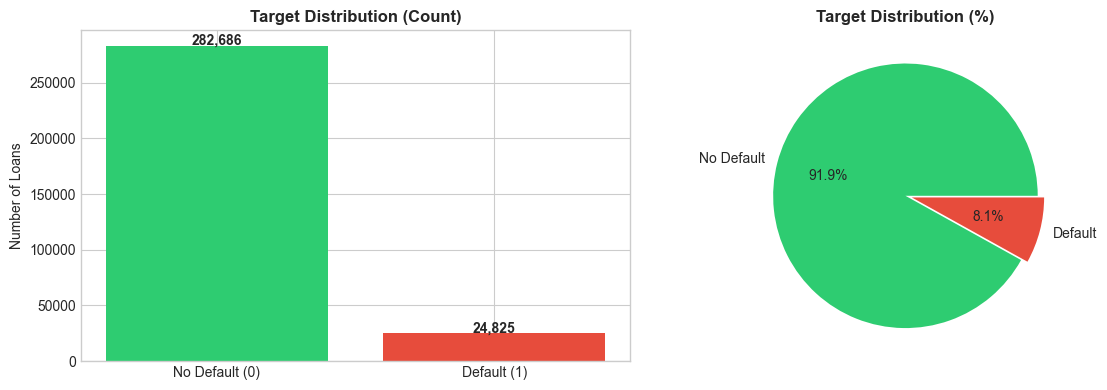


⚠️ INSIGHT: This is an IMBALANCED dataset!
   Default rate is only ~8%. We'll need to handle this in modeling.


In [26]:
# Target distribution
print("=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)

target_counts = df['TARGET'].value_counts()
target_pct = df['TARGET'].value_counts(normalize=True) * 100

print("\nAbsolute counts:")
print(target_counts)
print("\nPercentages:")
print(f"No Default (0): {target_pct[0]:.2f}%")
print(f"Default (1): {target_pct[1]:.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['No Default (0)', 'Default (1)'], target_counts.values, color=colors)
axes[0].set_title('Target Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Loans')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['No Default', 'Default'], 
            autopct='%1.1f%%', colors=colors, explode=[0, 0.05])
axes[1].set_title('Target Distribution (%)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports' / 'target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n⚠️ INSIGHT: This is an IMBALANCED dataset!")
print("   Default rate is only ~8%. We'll need to handle this in modeling.")

# 4. Missing Values Analysis

Understanding missing data is crucial for:
- Feature engineering decisions
- Model selection (XGBoost handles missing values natively)
- Data quality assessment

In [27]:
# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
print(f"\nColumns with missing values: {len(missing_df)} out of {df.shape[1]}")
print(f"\nTop 20 columns by missing percentage:")
print(missing_df.head(20).to_string())

MISSING VALUES ANALYSIS

Columns with missing values: 67 out of 122

Top 20 columns by missing percentage:
                          Missing Count  Missing %
COMMONAREA_AVG                   214865  69.872297
COMMONAREA_MODE                  214865  69.872297
COMMONAREA_MEDI                  214865  69.872297
NONLIVINGAPARTMENTS_MEDI         213514  69.432963
NONLIVINGAPARTMENTS_MODE         213514  69.432963
NONLIVINGAPARTMENTS_AVG          213514  69.432963
FONDKAPREMONT_MODE               210295  68.386172
LIVINGAPARTMENTS_AVG             210199  68.354953
LIVINGAPARTMENTS_MEDI            210199  68.354953
LIVINGAPARTMENTS_MODE            210199  68.354953
FLOORSMIN_MODE                   208642  67.848630
FLOORSMIN_AVG                    208642  67.848630
FLOORSMIN_MEDI                   208642  67.848630
YEARS_BUILD_AVG                  204488  66.497784
YEARS_BUILD_MODE                 204488  66.497784
YEARS_BUILD_MEDI                 204488  66.497784
OWN_CAR_AGE               

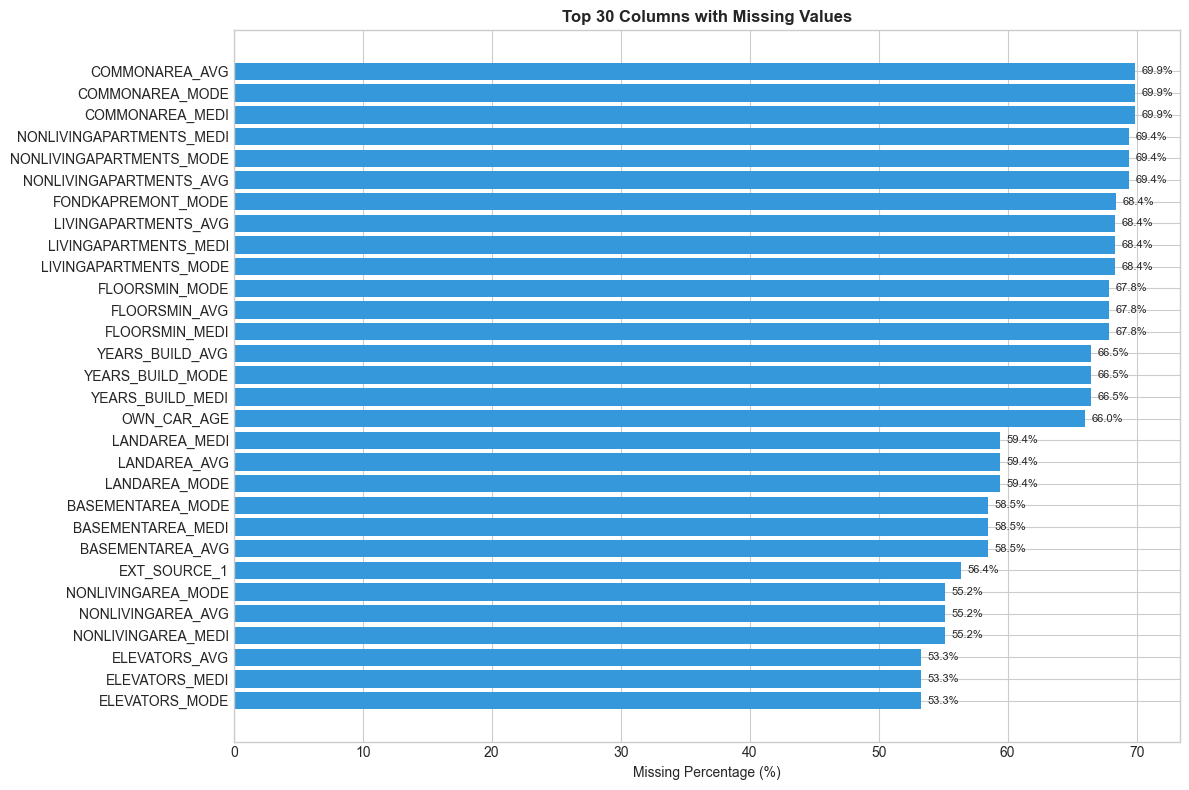

In [28]:
# Visualize missing values (top 30)
fig, ax = plt.subplots(figsize=(12, 8))
top_missing = missing_df.head(30)

bars = ax.barh(range(len(top_missing)), top_missing['Missing %'].values, color='#3498db')
ax.set_yticks(range(len(top_missing)))
ax.set_yticklabels(top_missing.index)
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Top 30 Columns with Missing Values', fontsize=12, fontweight='bold')
ax.invert_yaxis()

# Add percentage labels
for i, v in enumerate(top_missing['Missing %'].values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=8)

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports' / 'missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

# 5. Key Feature Analysis

Let's explore the most important features for credit risk assessment:
- Income and employment
- Credit amount and annuity
- Age and family status
- External data sources

In [29]:
# Define key features to analyze
key_features = [
    'AMT_INCOME_TOTAL',      # Total income
    'AMT_CREDIT',            # Credit amount of the loan
    'AMT_ANNUITY',           # Loan annuity (periodic payment)
    'AMT_GOODS_PRICE',       # Price of goods for which loan is given
    'DAYS_BIRTH',            # Age in days (negative)
    'DAYS_EMPLOYED',         # Employment length in days (negative)
    'EXT_SOURCE_1',          # External data source score 1
    'EXT_SOURCE_2',          # External data source score 2
    'EXT_SOURCE_3',          # External data source score 3
]

print("=" * 60)
print("KEY FEATURES STATISTICS")
print("=" * 60)
df[key_features].describe().T

KEY FEATURES STATISTICS


,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
EXT_SOURCE_1,134133.0,0.502130,0.211062,1.456813e-02,0.334007,0.505998,0.675053,9.626928e-01
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,8.549997e-01
EXT_SOURCE_3,246546.0,0.510853,0.194844,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01


In [30]:
# Convert DAYS columns to more interpretable units
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365.25
df['EMPLOYMENT_YEARS'] = -df['DAYS_EMPLOYED'] / 365.25

# Handle anomaly: DAYS_EMPLOYED = 365243 means unemployed/retired
df.loc[df['DAYS_EMPLOYED'] == 365243, 'EMPLOYMENT_YEARS'] = np.nan

print("Age distribution:")
print(df['AGE_YEARS'].describe())

print("\nEmployment years distribution (excluding unemployed):")
print(df['EMPLOYMENT_YEARS'].describe())

Age distribution:
count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: AGE_YEARS, dtype: float64

Employment years distribution (excluding unemployed):
count    252137.000000
mean          6.527500
std           6.402081
min           0.000000
25%           2.099932
50%           4.511978
75%           8.692676
max          49.040383
Name: EMPLOYMENT_YEARS, dtype: float64


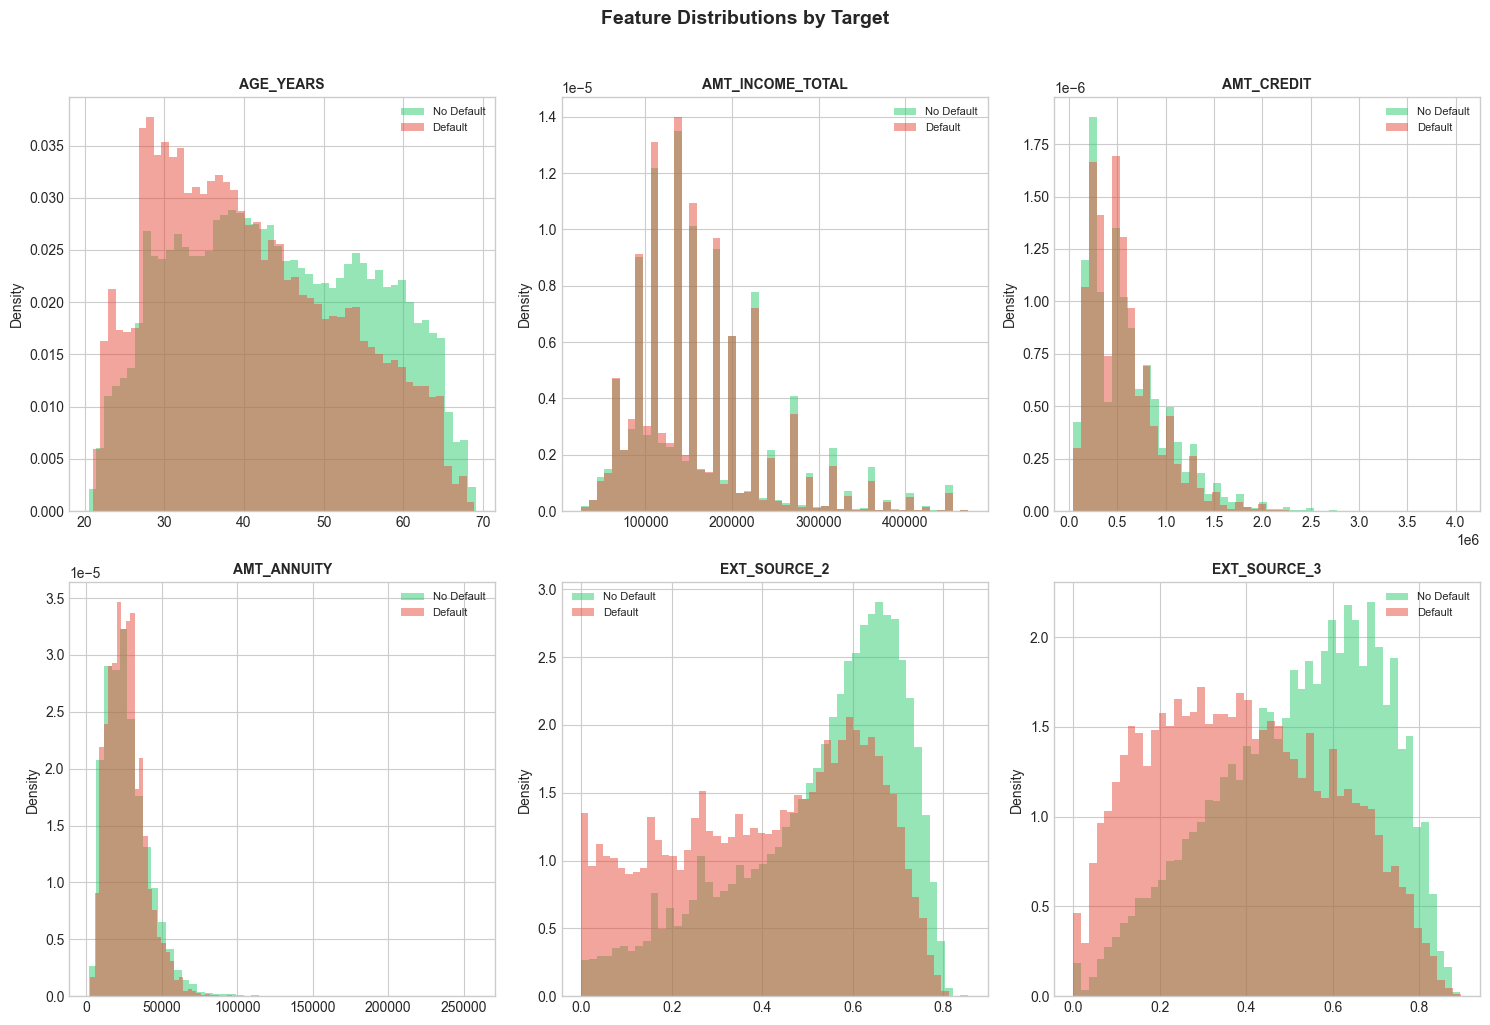

In [31]:
# Visualize distributions of key numerical features by target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features_to_plot = ['AGE_YEARS', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
                    'AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    
    # Filter extreme outliers for visualization
    data_0 = df[df['TARGET'] == 0][feature].dropna()
    data_1 = df[df['TARGET'] == 1][feature].dropna()
    
    # Use percentiles to limit range
    if feature == 'AMT_INCOME_TOTAL':
        upper_limit = df[feature].quantile(0.99)
        data_0 = data_0[data_0 <= upper_limit]
        data_1 = data_1[data_1 <= upper_limit]
    
    ax.hist(data_0, bins=50, alpha=0.5, label='No Default', color='#2ecc71', density=True)
    ax.hist(data_1, bins=50, alpha=0.5, label='Default', color='#e74c3c', density=True)
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.legend(fontsize=8)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.suptitle('Feature Distributions by Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports' / 'feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# 6. External Source Scores Analysis

The EXT_SOURCE features are particularly important - they represent normalized scores from external data providers (like credit bureaus). These are often the most predictive features!

In [32]:
# Correlation of EXT_SOURCE with TARGET
ext_source_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

print("=" * 60)
print("EXTERNAL SOURCE CORRELATION WITH DEFAULT")
print("=" * 60)
for col in ext_source_cols:
    corr = df[col].corr(df['TARGET'])
    print(f"{col}: {corr:.4f}")

print("\n💡 INSIGHT: Negative correlation means higher score = lower default risk")

EXTERNAL SOURCE CORRELATION WITH DEFAULT
EXT_SOURCE_1: -0.1553
EXT_SOURCE_2: -0.1605
EXT_SOURCE_3: -0.1789

💡 INSIGHT: Negative correlation means higher score = lower default risk



Default Rate by EXT_SOURCE_2 Deciles:
      EXT_SOURCE_2_BIN  Default_Rate  Count
(-0.0009999183, 0.216]        0.1835  30686
         (0.216, 0.34]        0.1208  30685
          (0.34, 0.44]        0.0996  30687
         (0.44, 0.512]        0.0836  30684
        (0.512, 0.566]        0.0742  30684
        (0.566, 0.608]        0.0665  30687
        (0.608, 0.646]        0.0585  30683
        (0.646, 0.682]        0.0488  30694
        (0.682, 0.722]        0.0420  30676
        (0.722, 0.855]        0.0297  30685


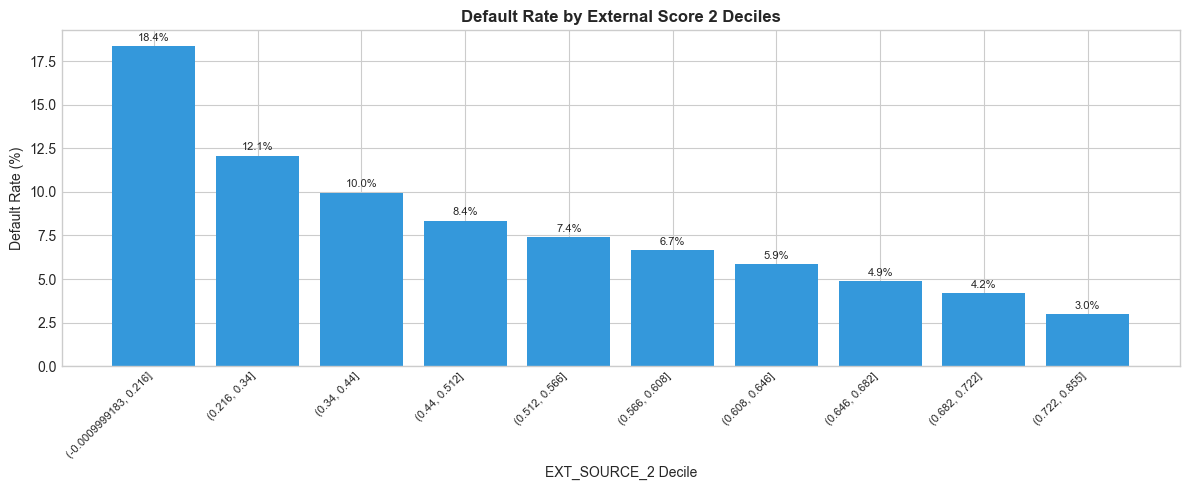


🎯 KEY FINDING: Clear monotonic relationship - higher external score = lower default rate


In [33]:
# Default rate by EXT_SOURCE_2 bins
df['EXT_SOURCE_2_BIN'] = pd.qcut(df['EXT_SOURCE_2'].dropna(), q=10, duplicates='drop')

ext2_analysis = df.groupby('EXT_SOURCE_2_BIN', observed=True).agg({
    'TARGET': ['mean', 'count']
}).round(4)
ext2_analysis.columns = ['Default_Rate', 'Count']
ext2_analysis = ext2_analysis.reset_index()

print("\nDefault Rate by EXT_SOURCE_2 Deciles:")
print(ext2_analysis.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 5))
x_labels = [str(x) for x in ext2_analysis['EXT_SOURCE_2_BIN']]
bars = ax.bar(range(len(ext2_analysis)), ext2_analysis['Default_Rate'] * 100, color='#3498db')
ax.set_xticks(range(len(ext2_analysis)))
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)
ax.set_xlabel('EXT_SOURCE_2 Decile')
ax.set_ylabel('Default Rate (%)')
ax.set_title('Default Rate by External Score 2 Deciles', fontsize=12, fontweight='bold')

# Add value labels
for i, v in enumerate(ext2_analysis['Default_Rate'] * 100):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=8)

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports' / 'ext_source_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🎯 KEY FINDING: Clear monotonic relationship - higher external score = lower default rate")

# 7. Categorical Features Analysis

In [34]:
# Analyze key categorical features
cat_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

print("=" * 60)
print("CATEGORICAL FEATURES - DEFAULT RATES")
print("=" * 60)

for feature in cat_features:
    print(f"\n{feature}:")
    analysis = df.groupby(feature).agg({
        'TARGET': ['mean', 'count']
    }).round(4)
    analysis.columns = ['Default_Rate', 'Count']
    analysis = analysis.sort_values('Default_Rate', ascending=False)
    print(analysis.to_string())

CATEGORICAL FEATURES - DEFAULT RATES

NAME_CONTRACT_TYPE:
                    Default_Rate   Count
NAME_CONTRACT_TYPE                      
Cash loans                0.0835  278232
Revolving loans           0.0548   29279

CODE_GENDER:
             Default_Rate   Count
CODE_GENDER                      
M                  0.1014  105059
F                  0.0700  202448
XNA                0.0000       4

FLAG_OWN_CAR:
              Default_Rate   Count
FLAG_OWN_CAR                      
N                   0.0850  202924
Y                   0.0724  104587

FLAG_OWN_REALTY:
                 Default_Rate   Count
FLAG_OWN_REALTY                      
N                      0.0832   94199
Y                      0.0796  213312

NAME_INCOME_TYPE:
                      Default_Rate   Count
NAME_INCOME_TYPE                          
Maternity leave             0.4000       5
Unemployed                  0.3636      22
Working                     0.0959  158774
Commercial associate        0.0748 

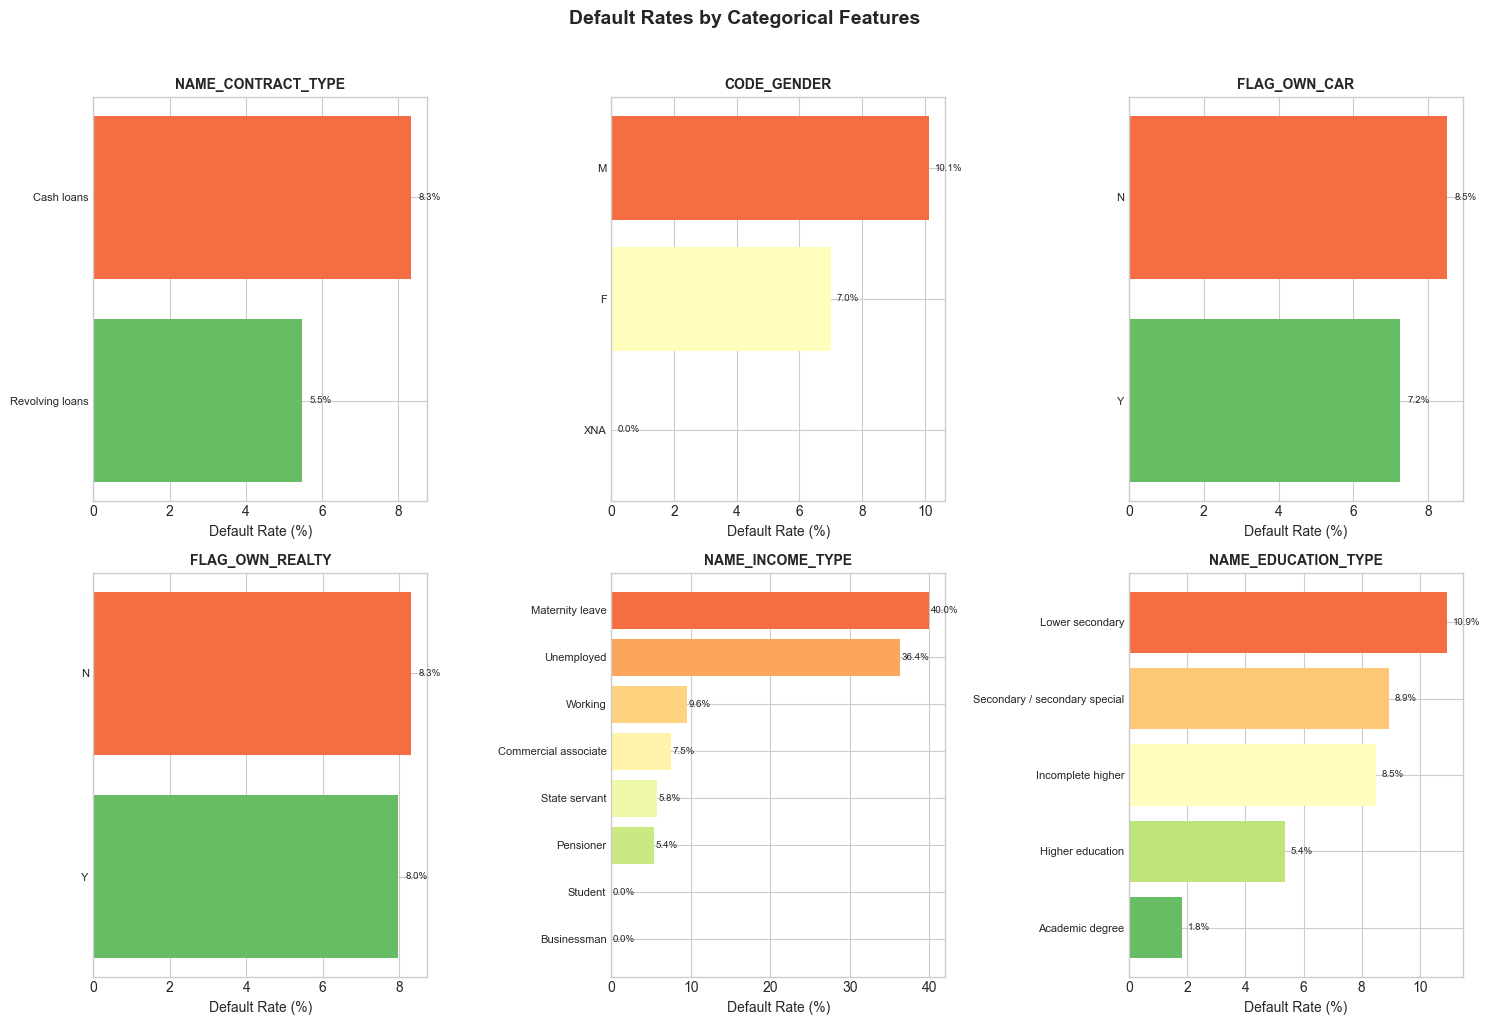

In [35]:
# Visualize default rates by key categorical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(cat_features):
    ax = axes[idx]
    analysis = df.groupby(feature)['TARGET'].mean().sort_values(ascending=True)
    
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(analysis)))
    bars = ax.barh(range(len(analysis)), analysis.values * 100, color=colors)
    ax.set_yticks(range(len(analysis)))
    ax.set_yticklabels(analysis.index, fontsize=8)
    ax.set_xlabel('Default Rate (%)')
    ax.set_title(feature, fontsize=10, fontweight='bold')
    
    # Add value labels
    for i, v in enumerate(analysis.values * 100):
        ax.text(v + 0.2, i, f'{v:.1f}%', va='center', fontsize=7)

plt.suptitle('Default Rates by Categorical Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports' / 'categorical_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# 8. Summary and Next Steps

In [36]:
print("=" * 60)
print("EDA SUMMARY")
print("=" * 60)

print("""
📊 DATASET OVERVIEW:
- 307,511 loan applications with 122 features
- Target: 8.07% default rate (imbalanced)

🔑 KEY FINDINGS:

1. IMBALANCED TARGET:
   - Only ~8% defaults - will need class balancing techniques
   - Options: SMOTE, class weights, threshold tuning

2. MISSING VALUES:
   - Many columns have >40% missing data
   - XGBoost handles missing values natively - advantage!
   - Some features may need imputation or removal

3. MOST PREDICTIVE FEATURES (based on EDA):
   - EXT_SOURCE_1, _2, _3: Strong negative correlation with default
   - AGE: Older applicants tend to have lower default rates
   - AMT_CREDIT: Loan amount patterns differ by default status
   - NAME_INCOME_TYPE: Some income types have much higher default rates

4. FEATURE ENGINEERING OPPORTUNITIES:
   - Debt-to-income ratio: AMT_CREDIT / AMT_INCOME_TOTAL
   - Payment burden: AMT_ANNUITY / AMT_INCOME_TOTAL  
   - Credit-to-goods ratio: AMT_CREDIT / AMT_GOODS_PRICE
   - Combine external sources: mean, weighted average

📋 NEXT STEPS:
1. Feature engineering (Notebook 02)
2. Model training and evaluation (Notebook 03)
3. SHAP explainability analysis (Notebook 04)
4. Build AI Agent for risk monitoring (agents/)
5. Create Streamlit dashboard (app/)
""")

EDA SUMMARY

📊 DATASET OVERVIEW:
- 307,511 loan applications with 122 features
- Target: 8.07% default rate (imbalanced)

🔑 KEY FINDINGS:

1. IMBALANCED TARGET:
   - Only ~8% defaults - will need class balancing techniques
   - Options: SMOTE, class weights, threshold tuning

2. MISSING VALUES:
   - Many columns have >40% missing data
   - XGBoost handles missing values natively - advantage!
   - Some features may need imputation or removal

3. MOST PREDICTIVE FEATURES (based on EDA):
   - EXT_SOURCE_1, _2, _3: Strong negative correlation with default
   - AGE: Older applicants tend to have lower default rates
   - AMT_CREDIT: Loan amount patterns differ by default status
   - NAME_INCOME_TYPE: Some income types have much higher default rates

4. FEATURE ENGINEERING OPPORTUNITIES:
   - Debt-to-income ratio: AMT_CREDIT / AMT_INCOME_TOTAL
   - Payment burden: AMT_ANNUITY / AMT_INCOME_TOTAL  
   - Credit-to-goods ratio: AMT_CREDIT / AMT_GOODS_PRICE
   - Combine external sources: mean, wei

---
**End of Notebook 01: EDA**

Next: `02_feature_engineering.ipynb`